## LOAD MODEL FOR PREDICTION AND EVALUATION

In [4]:
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
from joblib import dump, load
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
%matplotlib inline
from data_cleaning import *
import warnings
import holoviews as hv

warnings.filterwarnings('ignore')

In [5]:
# get tweets data 
df = load_tweets_csv('tweets')
df.head()

,user_name,user_location,user_followers,user_friends,user_favourites,user_verified,text,source
date,,,,,,,,
2020-08-09 19:15:00,Ashwin,India 🇮🇳,89,3108,6780,False,Huge Thanks And Best Wishes With @SerumInstInd...,Twitter for Android
2020-08-09 20:02:00,K. Kartik Rao,Mumbai and Nagpur India,225,257,25362,False,Any update of #CovidVaccine ????,Twitter for Android
2020-08-09 21:21:00,Mac Patrick (Road Hater) Henry,German Bundesrepublik,338,277,28305,False,From a private frontline COVID nurses group to...,Twitter Web App
2020-08-09 21:29:00,lydia Bell,Earth,2038,1105,63422,False,So you want the whole world to take a #covidva...,Twitter for iPhone
2020-08-09 22:55:00,Lou Ann Donovan,"Kansas, USA",4365,4581,2505,False,Watch to learn about the Phase 3 clinical tria...,Twitter for iPhone


In [7]:
# vader sentiment analysis of text
ret_df = analyse_sentimemnt_vader(df)
ret_df.head()

,user_name,user_location,user_followers,user_friends,user_favourites,text,compound,positive,negative,neutral,user_verified,source
date,,,,,,,,,,,,
2020-08-09 19:15:00,Ashwin,India 🇮🇳,89,3108,6780,Huge Thanks And Best Wishes With @SerumInstInd...,0.9169,0.517,0.0,0.483,False,Twitter for Android
2020-08-09 20:02:00,K. Kartik Rao,Mumbai and Nagpur India,225,257,25362,Any update of #CovidVaccine ????,0.0000,0.000,0.0,1.000,False,Twitter for Android
2020-08-09 21:21:00,Mac Patrick (Road Hater) Henry,German Bundesrepublik,338,277,28305,From a private frontline COVID nurses group to...,0.0000,0.000,0.0,1.000,False,Twitter Web App
2020-08-09 21:29:00,lydia Bell,Earth,2038,1105,63422,So you want the whole world to take a #covidva...,0.0745,0.058,0.0,0.942,False,Twitter for iPhone
2020-08-09 22:55:00,Lou Ann Donovan,"Kansas, USA",4365,4581,2505,Watch to learn about the Phase 3 clinical tria...,0.0000,0.000,0.0,1.000,False,Twitter for iPhone


# 15 MIN Tweets and Stock Return Analysis

In [9]:
# get cleaned tweets data
tweet_df_15m = process_tweets(ret_df, '15min')
tweet_df_15m.columns

Index(['user_followers', 'user_friends', 'user_favourites',
       'weighted_compound', 'source_92 News HD', 'source_@healthpolicyw',
       'source_A Touch of Snark', 'source_Africa Newsroom',
       'source_AgoraPulse Manager', 'source_Algotiger',
       ...
       'source_econ b2b post', 'source_happs.tv',
       'source_iHeartMedia Publishing', 'source_iLoveKent2', 'source_iNVEZZ',
       'source_iOS', 'source_recurpost.com', 'source_robly_marketing',
       'source_syllogiTweeter', 'verified'],
      dtype='object', length=215)

In [5]:
# get pfizer 15 mins share price
share_df_15m = load_stock_csv('Pfizer')

In [6]:
# calculate pfizer return
share_return_df_15m = get_return(share_df_15m)

In [7]:
# concat two dataframe 
combined_df_15m = concat_df(tweet_df_15m, share_return_df_15m)

In [122]:
# shift up return by 1 
combined_df_shift_15m = final_df(combined_df_15m, -1)
combined_df_shift_15m.head()

,user_followers,user_friends,user_favourites,weighted_compound,source_92 News HD,source_@healthpolicyw,source_A Touch of Snark,source_Africa Newsroom,source_AgoraPulse Manager,source_Algotiger,...,source_iHeartMedia Publishing,source_iLoveKent2,source_iNVEZZ,source_iOS,source_recurpost.com,source_robly_marketing,source_syllogiTweeter,verified,return,return_bol
date,,,,,,,,,,,,,,,,,,,,,
2020-08-09 00:00:00,6741.0,5963.0,94232.0,151.8310,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001041,1
2020-08-09 19:15:00,89.0,3108.0,6780.0,81.6041,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001041,1
2020-08-09 19:30:00,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001041,1
2020-08-09 19:45:00,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001041,1
2020-08-09 20:00:00,225.0,257.0,25362.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001041,1


## Random Forest

In [9]:
import importlib
import Machine_Learning_Models.random_forest
importlib.reload(Machine_Learning_Models.random_forest)
from Machine_Learning_Models.random_forest import *

In [10]:
# Define features set
X_15m = combined_df_shift_15m.copy()
X_15m.drop(["return", 'return_bol'], axis=1, inplace=True)

# Define target vector
y_15m = combined_df_shift_15m["return_bol"].values.reshape(-1,1)

In [11]:
# Splitting into Train and Test sets
X_train_scaled_15m, X_test_scaled_15m, y_train_15m, y_test_15m =data_split_scale(combined_df_shift_15m)

In [12]:
# Load the model and make the predictions from the x test dataset
model_forest_15m = load('rf_15m.joblib')

In [13]:
# Making predictions using the testing data
predictions_rf_15m = model_forest_15m.predict(X_test_scaled_15m)

# Calculating the confusion matrix
cm = confusion_matrix(y_test_15m, predictions_rf_15m)
cm_rf_15m = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
# Calculating the accuracy score
acc_score_rf_15m = accuracy_score(y_test_15m, predictions_rf_15m)

# Displaying results
print("Confusion Matrix")
display(cm_rf_15m)
cm_rf_15 = classification_report(y_test_15m, predictions_rf_15m)
print(f"Accuracy Score : {acc_score_rf_15m}")
print("Classification Report")
print(cm_rf_15)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,234,1084
Actual 1,293,1527


Accuracy Score : 0.5611854684512428
Classification Report
              precision    recall  f1-score   support

           0       0.44      0.18      0.25      1318
           1       0.58      0.84      0.69      1820

    accuracy                           0.56      3138
   macro avg       0.51      0.51      0.47      3138
weighted avg       0.53      0.56      0.51      3138



In [14]:
# Get the feature importance array
importances_15m = model_forest_15m.feature_importances_

# List the top 10 most important features
importances_sorted_15m = sorted(zip(model_forest_15m.feature_importances_, X_15m.columns), reverse=True)
importances_sorted_15m[:10]

[(0.1543671694110743, 'user_favourites'),
 (0.15395926718290606, 'user_followers'),
 (0.15237594928739673, 'user_friends'),
 (0.1396277398273498, 'weighted_compound'),
 (0.06379516426946341, 'source_Twitter Web App'),
 (0.05557509827674211, 'source_Twitter for iPhone'),
 (0.05445789981861841, 'source_Twitter for Android'),
 (0.02300520891373114, 'source_TweetDeck'),
 (0.02233383683870411, 'source_Hootsuite Inc.'),
 (0.019677327619730667, 'source_Twitter for iPad')]

## GaussianNB

In [15]:
# Load the model and make the predictions from the x test dataset
model_gnb_15m = load('gnb_15m.joblib')

In [16]:
# Making predictions using the testing data
predictions_gnb_15m = model_gnb_15m.predict(X_test_scaled_15m)

# Calculating the confusion matrix
cm = confusion_matrix(y_test_15m, predictions_gnb_15m)
cm_df_gnb_15m = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
# Calculating the accuracy score
acc_score_gnb_15m = accuracy_score(y_test_15m, predictions_gnb_15m)

# Displaying results
print("Confusion Matrix")
display(cm_df_gnb_15m)

print(f"Accuracy Score : {acc_score_gnb_15m}")
print("Classification Report")
print(classification_report(y_test_15m, predictions_gnb_15m))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1297,21
Actual 1,1783,37


Accuracy Score : 0.4251115360101976
Classification Report
              precision    recall  f1-score   support

           0       0.42      0.98      0.59      1318
           1       0.64      0.02      0.04      1820

    accuracy                           0.43      3138
   macro avg       0.53      0.50      0.31      3138
weighted avg       0.55      0.43      0.27      3138



## Gradiant Boost Tree

In [17]:
# Load the model and make the predictions from the x test dataset
model_gbt_15m = load('gbt_15m.joblib')

In [18]:
# Make predictions
predictions_gbt_15m = model_gbt_15m.predict(X_test_scaled_15m)  

# Score the model
print("Accuracy score (training): {0:.3f}".format(
model_gbt_15m.score(
        X_train_scaled_15m,
        y_train_15m)))
print("Accuracy score (validation): {0:.3f}".format(
model_gbt_15m.score(
        X_test_scaled_15m,
        y_test_15m)))
    
# Calculating the confusion matrix
cm = confusion_matrix(y_test_15m, predictions_gbt_15m)
cm_df_gbt_15m = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
# Calculating the accuracy score
acc_score_gbt_15m = accuracy_score(y_test_15m, predictions_gbt_15m)

# Displaying results
print("Confusion Matrix")
display(cm_df_gbt_15m)
print(f"Accuracy Score : {acc_score_gbt_15m}")
print("Classification Report")
print(classification_report(y_test_15m, predictions_gbt_15m))

Accuracy score (training): 0.599
Accuracy score (validation): 0.574
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,114,1204
Actual 1,134,1686


Accuracy Score : 0.5736137667304015
Classification Report
              precision    recall  f1-score   support

           0       0.46      0.09      0.15      1318
           1       0.58      0.93      0.72      1820

    accuracy                           0.57      3138
   macro avg       0.52      0.51      0.43      3138
weighted avg       0.53      0.57      0.48      3138



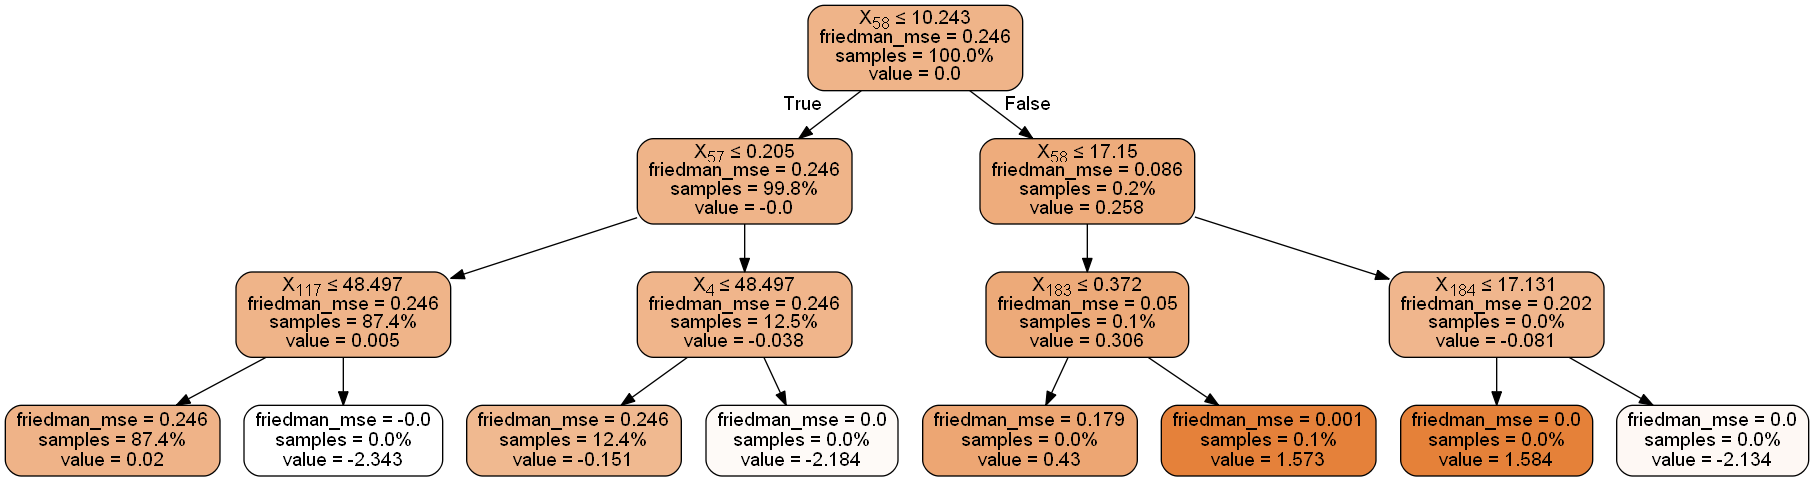

In [19]:
from sklearn import tree
# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

# Graph tree
dot_data = tree.export_graphviz(
    model_gbt_15m.estimators_[9, 0],
    out_file=None, filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
    )
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Regression

In [20]:
# Load the model to predict values
from tensorflow.keras.models import model_from_json
import importlib
import Machine_Learning_Models.rnn
importlib.reload(Machine_Learning_Models.rnn)
from Machine_Learning_Models.rnn import *

In [21]:
combined_reg_df_15m = combined_df_shift_15m[['user_followers', 'weighted_compound', 'return']]
combined_reg_df_15m.head()

,user_followers,weighted_compound,return
date,,,
2020-08-09 00:00:00,6741.0,151.8310,0.001041
2020-08-09 19:15:00,89.0,81.6041,0.001041
2020-08-09 19:30:00,0.0,0.0000,0.001041
2020-08-09 19:45:00,0.0,0.0000,0.001041
2020-08-09 20:00:00,225.0,0.0000,0.001041


In [22]:
# Predict Closing Prices using a 4 hours window of previous fng values
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 16

# Column index 1 is the 'compound' column
# Column index 2 is the `return` column
extra_col = 1
feature_col = 0
target_col = 2
X_15m, y_15m = window_data(combined_reg_df_15m, window_size, feature_col, target_col, extra_col)

In [23]:
X_train_15m, X_test_15m, y_train_15m, y_test_15m, y_test_scaler_15m = data_split_scale(X_15m, y_15m)

In [24]:
# Load json and create model
file_path = Path("rnn_15m.json")
with open(file_path, "r") as json_file:
    model_json = json_file.read()
model_rnn_15m = model_from_json(model_json)

# Load weights into new model
file_path = "rnn_15m.h5"
model_rnn_15m.load_weights(file_path)

In [25]:
model_rnn_15m.compile(optimizer="adam", loss="mean_squared_error")

In [26]:
# Evaluate the model
model_rnn_15m.evaluate(X_test_15m, y_test_15m, verbose=1)

118/118 [==============================] - 7s 8ms/step - loss: 0.0143


0.014433145523071289

In [27]:
# Make some predictions
predicted_rnn_15m = model_rnn_15m.predict(X_test_15m)

In [28]:
# Recover the original prices instead of the scaled version
predicted_prices_15m = y_test_scaler_15m .inverse_transform(predicted_rnn_15m)
real_prices_15m = y_test_scaler_15m.inverse_transform(y_test_15m.reshape(-1, 1))

In [29]:
# Create a DataFrame of Real and Predicted values
stocks_15m = pd.DataFrame({
    "Real_15m": real_prices_15m.ravel(),
    "Predicted_15m": predicted_prices_15m.ravel()
}, index = combined_reg_df_15m.index[-len(real_prices_15m): ]) 
stocks_15m.tail()

,Real_15m,Predicted_15m
date,,
2021-02-18 18:45:00,-0.000869,0.007582
2021-02-18 19:00:00,0.000290,0.007584
2021-02-18 19:15:00,0.000290,0.007586
2021-02-18 19:30:00,0.000290,0.007589
2021-02-18 19:45:00,0.000290,0.007594


In [30]:
# Plot the real vs predicted values as a line chart
s_15 = stocks_15m.hvplot(title="Actual Vs. Predicted PFE Returns").opts(shared_axes=False)

## Algorithmic Trading

In [31]:
import importlib
import algo_trading
importlib.reload(algo_trading)
from algo_trading import *

In [32]:
# Construct Trading Signal
algo_df_15m = pd.concat([combined_df_shift_15m[['weighted_compound', 'return']], share_df_15m[['close']]], join = 'inner', axis = 1)
algo_signal_15m = generate_signals(algo_df_15m, 4, 16, 96)
algo_signal_15m.head()

,weighted_compound,return,close,weighted_compound_long,weighted_compound_short,sentiment_signal,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
date,,,,,,,,,,,,,,,,,,
2020-08-10 05:30:00,0.0000,0.003899,35.733230,0.0,0.0,0.0,35.733230,35.733230,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-08-10 07:15:00,0.0000,-0.002848,35.872559,0.0,0.0,0.0,35.808915,35.804403,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-08-10 07:30:00,0.0000,0.000260,35.770384,0.0,0.0,0.0,35.793793,35.792569,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-08-10 07:45:00,-198259.7904,-0.000519,35.779673,0.0,-1.0,-1.0,35.789300,35.789133,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-08-10 08:00:00,203.3200,0.000000,35.761096,1.0,0.0,1.0,35.781557,35.783029,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [33]:
# prepare trading data 
X_train_15m, X_test_15m, y_train_15m, y_test_15m = prepare_model(algo_signal_15m)

Training Start: 2020-08-10 07:15:00
Training End: 2021-01-01 20:00:00
Testing Start: 2021-01-02 04:15:00
Testing End: 2021-02-18 19:45:00


In [34]:
# Load the model and make the predictions from the x test dataset
model_algo_15m = load('algo_15m.joblib')

In [35]:
# Make a prediction of "y" values from the x test dataset
predictions_algo_15m = model_algo_15m.predict(X_test_15m)

# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results_15m = y_test_15m.to_frame()
Results_15m["Predicted Value"] = predictions_algo_15m
Results_15m.head()

,Positive Return,Predicted Value
date,,
2021-01-04 04:15:00,1.0,0.0
2021-01-04 04:30:00,0.0,0.0
2021-01-04 04:45:00,1.0,0.0
2021-01-04 05:00:00,1.0,0.0
2021-01-04 05:15:00,0.0,0.0


In [36]:
Results_15m_plot = Results_15m[["Positive Return", 'Predicted Value']].hvplot(title = '15 mins Trading Signal').opts(width=1000, height=500, shared_axes=False)
Results_15m_plot 

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [37]:
# Replace predicted values 0 to -1 to account for shorting
results_15m = Results_15m.join(algo_df_15m['return'])
results_15m['Predicted Value'].replace(0, -1, inplace=True)
results_15m.head()

,Positive Return,Predicted Value,return
date,,,
2021-01-04 04:15:00,1.0,-1.0,0.000270
2021-01-04 04:30:00,0.0,-1.0,-0.001080
2021-01-04 04:45:00,1.0,-1.0,0.000811
2021-01-04 05:00:00,1.0,-1.0,0.001080
2021-01-04 05:15:00,0.0,-1.0,0.000000


### Plot Cumulative Returns of Random Forest Model

In [38]:
# Calculate cumulative return of model and plot the result
cumulative_return_15m = (1 + (results_15m['return'] * results_15m['Predicted Value'])).cumprod()
cumulative_return_15m_plot = cumulative_return_15m.hvplot(groupby=['index.day'], title = '15 mins Compound Return').opts(axiswise=True)
cumulative_return_15m_plot

:DynamicMap   [index.day]
   :Curve   [date]   (0)

### Plot Cumulative Return of Random Forest Model (In Terms of Capital)

In [39]:
from bokeh.models.formatters import DatetimeTickFormatter
# Set initial capital allocation
initial_capital = 100000
formatter = DatetimeTickFormatter(months='%b %Y')
# Plot cumulative return of model in terms of capital
cumulative_return_capital_15m = initial_capital * (1 + (results_15m['return'] * results_15m['Predicted Value'])).cumprod()

In [40]:
cumulative_return_capital_15m_plot = cumulative_return_capital_15m.hvplot(title='Cumulative Capital').opts(yformatter="%.0f", axiswise=True)
cumulative_return_capital_15m_plot

:Curve   [date]   (0)

# 30 MIN Tweets and Stock Return Analysis

In [41]:
# get cleaned tweets data
tweet_df_30m = process_tweets(ret_df, '30min')
tweet_df_30m.head()

,user_followers,user_friends,user_favourites,weighted_compound,source_92 News HD,source_@healthpolicyw,source_A Touch of Snark,source_Africa Newsroom,source_AgoraPulse Manager,source_Algotiger,...,source_econ b2b post,source_happs.tv,source_iHeartMedia Publishing,source_iLoveKent2,source_iNVEZZ,source_iOS,source_recurpost.com,source_robly_marketing,source_syllogiTweeter,verified
date,,,,,,,,,,,,,,,,,,,,,
2020-08-09 00:00:00,6741,5963,94232,151.8310,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-08-09 19:00:00,89,3108,6780,81.6041,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-08-09 19:30:00,0,0,0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-08-09 20:00:00,225,257,25362,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-08-10 00:00:00,53169,33285,119290,13844.3117,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [42]:
# get pfizer 30 mins share price
share_df_30m = load_stock_csv('pfe_30m')

In [43]:
# calculate pfizer return
share_return_df_30m = get_return(share_df_30m)

In [44]:
# concat two dataframe 
combined_df_30m = concat_df(tweet_df_30m, share_return_df_30m)

In [45]:
# shift up return by 1 
combined_df_shift_30m = final_df(combined_df_30m, -1)
combined_df_shift_30m.head(10)

,user_followers,user_friends,user_favourites,weighted_compound,source_92 News HD,source_@healthpolicyw,source_A Touch of Snark,source_Africa Newsroom,source_AgoraPulse Manager,source_Algotiger,...,source_iHeartMedia Publishing,source_iLoveKent2,source_iNVEZZ,source_iOS,source_recurpost.com,source_robly_marketing,source_syllogiTweeter,verified,return,return_bol
date,,,,,,,,,,,,,,,,,,,,,
2020-08-09 00:00:00,6741.0,5963.0,94232.0,151.8310,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001041,1
2020-08-09 19:00:00,89.0,3108.0,6780.0,81.6041,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001041,1
2020-08-09 19:30:00,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001041,1
2020-08-09 20:00:00,225.0,257.0,25362.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001041,1
2020-08-10 00:00:00,53169.0,33285.0,119290.0,13844.3117,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.001041,1
2020-08-10 04:30:00,2175.0,795.0,2869.0,1263.0105,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001041,1
2020-08-10 05:00:00,335918.0,3078.0,25460.0,6425.1753,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.001041,1
2020-08-10 05:30:00,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001040,1
2020-08-10 06:00:00,140066.0,934.0,37451.0,17142.9842,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001040,1


## Random Forest

In [46]:
import importlib
import Machine_Learning_Models.random_forest
importlib.reload(Machine_Learning_Models.random_forest)
from Machine_Learning_Models.random_forest import *

In [47]:
# Define features set
X_30m = combined_df_shift_30m.copy()
X_30m.drop(["return", 'return_bol'], axis=1, inplace=True)

# Define target vector
y_30m = combined_df_shift_30m["return_bol"].values.reshape(-1,1)

In [48]:
# Splitting into Train and Test sets
X_train_scaled_30m, X_test_scaled_30m, y_train_30m, y_test_30m =data_split_scale(combined_df_shift_30m)

In [49]:
# Load the model and make the predictions from the x test dataset
model_forest_30m = load('rf_30m.joblib')

In [50]:
# Making predictions using the testing data
predictions_rf_30m = model_forest_30m.predict(X_test_scaled_30m)

# Calculating the confusion matrix
cm = confusion_matrix(y_test_30m, predictions_rf_30m)
cm_rf_30m = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
# Calculating the accuracy score
acc_score_rf_30m = accuracy_score(y_test_30m, predictions_rf_30m)

# Displaying results
print("Confusion Matrix")
display(cm_rf_30m)

print(f"Accuracy Score : {acc_score_rf_30m}")
print("Classification Report")
print(classification_report(y_test_30m, predictions_rf_30m))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,139,528
Actual 1,140,786


Accuracy Score : 0.5806654111738857
Classification Report
              precision    recall  f1-score   support

           0       0.50      0.21      0.29       667
           1       0.60      0.85      0.70       926

    accuracy                           0.58      1593
   macro avg       0.55      0.53      0.50      1593
weighted avg       0.56      0.58      0.53      1593



In [51]:
# Get the feature importance array
importances_30m = model_forest_30m.feature_importances_

# List the top 10 most important features
importances_sorted_30m = sorted(zip(model_forest_30m.feature_importances_, X_30m.columns), reverse=True)
importances_sorted_30m[:10]

[(0.13642570938153256, 'user_friends'),
 (0.1363419003647487, 'user_followers'),
 (0.13434952301923883, 'user_favourites'),
 (0.12795893800052346, 'weighted_compound'),
 (0.06808475287590408, 'source_Twitter Web App'),
 (0.058574368758392496, 'source_Twitter for Android'),
 (0.05440403703168832, 'source_Twitter for iPhone'),
 (0.02750102408643033, 'source_TweetDeck'),
 (0.025943969306147535, 'source_Hootsuite Inc.'),
 (0.024196049499976325, 'source_Twitter for iPad')]

## GaussianNB

In [52]:
# Load the model and make the predictions from the x test dataset
model_gnb_30m = load('gnb_30m.joblib')

In [53]:
# Making predictions using the testing data
predictions_gnb_30m = model_gnb_30m.predict(X_test_scaled_30m)

# Calculating the confusion matrix
cm = confusion_matrix(y_test_30m, predictions_gnb_30m)
cm_df_gnb_30m = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
# Calculating the accuracy score
acc_score_gnb_30m = accuracy_score(y_test_30m, predictions_gnb_30m)

# Displaying results
print("Confusion Matrix")
display(cm_df_gnb_30m)

print(f"Accuracy Score : {acc_score_gnb_30m}")
print("Classification Report")
print(classification_report(y_test_30m, predictions_gnb_30m))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,648,19
Actual 1,898,28


Accuracy Score : 0.4243565599497803
Classification Report
              precision    recall  f1-score   support

           0       0.42      0.97      0.59       667
           1       0.60      0.03      0.06       926

    accuracy                           0.42      1593
   macro avg       0.51      0.50      0.32      1593
weighted avg       0.52      0.42      0.28      1593



## Gradiant Boost Tree

In [54]:
# Load the model and make the predictions from the x test dataset
model_gbt_30m = load('gbt_30m.joblib')

In [55]:
# Make predictions
predictions_gbt_30m = model_gbt_30m.predict(X_test_scaled_30m)  

# Score the model
print("Accuracy score (training): {0:.3f}".format(
model_gbt_30m.score(
        X_train_scaled_30m,
        y_train_30m)))
print("Accuracy score (validation): {0:.3f}".format(
model_gbt_30m.score(
        X_test_scaled_30m,
        y_test_30m)))
    
# Calculating the confusion matrix
cm = confusion_matrix(y_test_30m, predictions_gbt_30m)
cm_df_gbt_30m = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
# Calculating the accuracy score
acc_score_gbt_30m = accuracy_score(y_test_30m, predictions_gbt_30m)

# Displaying results
print("Confusion Matrix")
display(cm_df_gbt_30m)
print(f"Accuracy Score : {acc_score_gbt_30m}")
print("Classification Report")
print(classification_report(y_test_30m, predictions_gbt_30m))

Accuracy score (training): 0.663
Accuracy score (validation): 0.591
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,103,564
Actual 1,87,839


Accuracy Score : 0.591337099811676
Classification Report
              precision    recall  f1-score   support

           0       0.54      0.15      0.24       667
           1       0.60      0.91      0.72       926

    accuracy                           0.59      1593
   macro avg       0.57      0.53      0.48      1593
weighted avg       0.57      0.59      0.52      1593



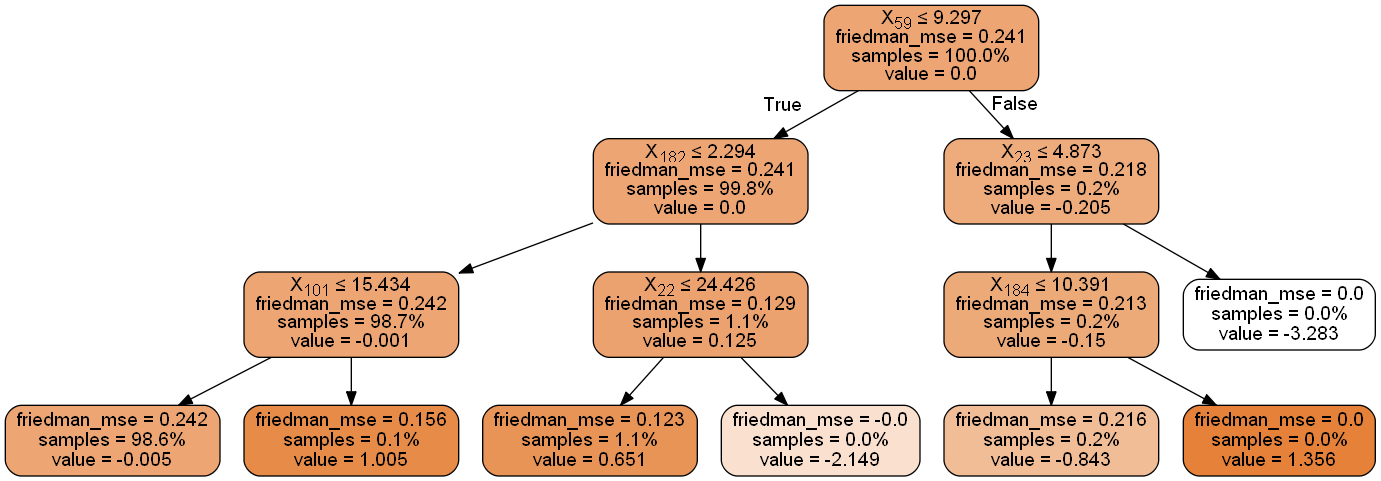

In [56]:
from sklearn import tree
# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

# Graph tree
dot_data = tree.export_graphviz(
    model_gbt_30m.estimators_[9, 0],
    out_file=None, filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
    )
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Regression

In [57]:
# Load the model to predict values
from tensorflow.keras.models import model_from_json
import importlib
import Machine_Learning_Models.rnn
importlib.reload(Machine_Learning_Models.rnn)
from Machine_Learning_Models.rnn import *

In [58]:
combined_reg_df_30m = combined_df_shift_30m[['user_followers', 'weighted_compound', 'return']]
combined_reg_df_30m.head()

,user_followers,weighted_compound,return
date,,,
2020-08-09 00:00:00,6741.0,151.8310,0.001041
2020-08-09 19:00:00,89.0,81.6041,0.001041
2020-08-09 19:30:00,0.0,0.0000,0.001041
2020-08-09 20:00:00,225.0,0.0000,0.001041
2020-08-10 00:00:00,53169.0,13844.3117,0.001041


In [59]:
# Predict Closing Prices using a 4 hours window of previous fng values
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 8

# Column index 1 is the 'compound' column
# Column index 2 is the `return` column
extra_col = 1
feature_col = 0
target_col = 2
X_30m, y_30m = window_data(combined_reg_df_30m, window_size, feature_col, target_col, extra_col)

In [60]:
X_train_30m, X_test_30m, y_train_30m, y_test_30m, y_test_scaler_30m = data_split_scale(X_30m, y_30m)

In [61]:
# Load json and create model
file_path = Path("rnn_30m.json")
with open(file_path, "r") as json_file:
    model_json = json_file.read()
model_rnn_30m = model_from_json(model_json)

# Load weights into new model
file_path = "rnn_30m.h5"
model_rnn_30m.load_weights(file_path)

In [62]:
model_rnn_30m.compile(optimizer="adam", loss="mean_squared_error")

In [63]:
# Evaluate the model
model_rnn_30m.evaluate(X_test_30m, y_test_30m, verbose=1)

60/60 [==============================] - 2s 6ms/step - loss: 0.0057


0.004463038872927427

In [64]:
# Make some predictions
predicted_rnn_30m = model_rnn_30m.predict(X_test_30m)

In [65]:
# Recover the original prices instead of the scaled version
predicted_prices_30m = y_test_scaler_30m .inverse_transform(predicted_rnn_30m)
real_prices_30m = y_test_scaler_30m.inverse_transform(y_test_30m.reshape(-1, 1))

In [66]:
# Create a DataFrame of Real and Predicted values
stocks_30m = pd.DataFrame({
    "Real_30m": real_prices_30m.ravel(),
    "Predicted_30m": predicted_prices_30m.ravel()
}, index = combined_reg_df_30m.index[-len(real_prices_30m): ]) 
stocks_30m.tail()

,Real_30m,Predicted_30m
date,,
2021-02-18 17:30:00,-0.000289,0.003520
2021-02-18 18:00:00,0.000869,0.003526
2021-02-18 18:30:00,-0.001736,0.003514
2021-02-18 19:00:00,0.000580,0.003502
2021-02-18 19:30:00,0.000579,0.003503


In [67]:
# Plot the real vs predicted values as a line chart
s_30 = stocks_30m.hvplot(title="Actual Vs. Predicted PFE Prices").opts(shared_axes=False)

## Algorithmic Trading

In [68]:
import importlib
import algo_trading
importlib.reload(algo_trading)
from algo_trading import *

In [69]:
# Construct Trading Signal
algo_df_30m = pd.concat([combined_df_shift_30m[['weighted_compound', 'return']], share_df_30m[['close']]], join = 'inner', axis = 1)
algo_signal_30m = generate_signals(algo_df_30m, 4, 16, 96)
algo_signal_30m.head()

,weighted_compound,return,close,weighted_compound_long,weighted_compound_short,sentiment_signal,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
date,,,,,,,,,,,,,,,,,,
2020-08-10 05:30:00,0.0000,0.001040,35.733230,0.0,0.0,0.0,35.733230,35.733230,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-08-10 07:30:00,-198259.7904,-0.000260,35.770384,0.0,-1.0,-1.0,35.753413,35.752210,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-08-10 08:00:00,203.3200,0.000519,35.761096,1.0,0.0,1.0,35.756428,35.755301,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-08-10 08:30:00,0.0000,0.000519,35.779673,0.0,0.0,0.0,35.763825,35.761795,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-08-10 09:00:00,-33622.4212,0.000259,35.798250,0.0,-1.0,-1.0,35.773276,35.769731,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [70]:
# prepare trading data 
X_train_30m, X_test_30m, y_train_30m, y_test_30m = prepare_model(algo_signal_30m)

Training Start: 2020-08-10 07:30:00
Training End: 2021-01-01 20:00:00
Testing Start: 2021-01-02 04:15:00
Testing End: 2021-02-18 19:30:00


In [71]:
# Load the model and make the predictions from the x test dataset
model_algo_30m = load('algo_30m.joblib')

In [72]:
# Make a prediction of "y" values from the x test dataset
predictions_algo_30m = model_algo_30m.predict(X_test_30m)

# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results_30m = y_test_30m.to_frame()
Results_30m["Predicted Value"] = predictions_algo_30m
Results_30m.head()

,Positive Return,Predicted Value
date,,
2021-01-04 04:30:00,0.0,0.0
2021-01-04 05:00:00,1.0,0.0
2021-01-04 05:30:00,1.0,0.0
2021-01-04 06:00:00,0.0,0.0
2021-01-04 06:30:00,0.0,0.0


In [73]:
Results_30m_plot = Results_30m[["Positive Return", 'Predicted Value']].hvplot(title = '30 mins Trading Signal').opts(width=1000, height=500, shared_axes=False)
Results_30m_plot

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [74]:
# Replace predicted values 0 to -1 to account for shorting
results_30m = Results_30m.join(algo_df_30m['return'])
results_30m['Predicted Value'].replace(0, -1, inplace=True)
results_30m.head()

,Positive Return,Predicted Value,return
date,,,
2021-01-04 04:30:00,0.0,-1.0,-0.000270
2021-01-04 05:00:00,1.0,-1.0,0.001080
2021-01-04 05:30:00,1.0,-1.0,0.002157
2021-01-04 06:00:00,0.0,-1.0,-0.000538
2021-01-04 06:30:00,0.0,-1.0,0.000000


### Plot Cumulative Returns of Random Forest Model

In [75]:
# Calculate cumulative return of model and plot the result
cumulative_return_30m = (1 + (results_30m['return'] * results_30m['Predicted Value'])).cumprod()
cumulative_return_30m_plot = cumulative_return_30m.hvplot(groupby=['index.day'], title = '30 mins Compound Return').opts(axiswise=True)
cumulative_return_30m_plot

:DynamicMap   [index.day]
   :Curve   [date]   (0)

### Plot Cumulative Return of Random Forest Model (In Terms of Capital)

In [76]:
from bokeh.models.formatters import DatetimeTickFormatter
# Set initial capital allocation
initial_capital = 100000
formatter = DatetimeTickFormatter(months='%b %Y')
# Plot cumulative return of model in terms of capital
cumulative_return_capital_30m = initial_capital * (1 + (results_30m['return'] * results_30m['Predicted Value'])).cumprod()

In [77]:
cumulative_return_capital_30m_plot = cumulative_return_capital_30m.hvplot(title='Cumulative Capital').opts(yformatter="%.0f", axiswise=True)
cumulative_return_capital_30m_plot

:Curve   [date]   (0)

# 60 MIN Tweets and Stock Return Analysis

In [78]:
# get cleaned tweets data
tweet_df_60m = process_tweets(ret_df, '60min')
tweet_df_60m.head()

,user_followers,user_friends,user_favourites,weighted_compound,source_92 News HD,source_@healthpolicyw,source_A Touch of Snark,source_Africa Newsroom,source_AgoraPulse Manager,source_Algotiger,...,source_econ b2b post,source_happs.tv,source_iHeartMedia Publishing,source_iLoveKent2,source_iNVEZZ,source_iOS,source_recurpost.com,source_robly_marketing,source_syllogiTweeter,verified
date,,,,,,,,,,,,,,,,,,,,,
2020-08-09 00:00:00,6741,5963,94232,151.8310,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-08-09 19:00:00,89,3108,6780,81.6041,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-08-09 20:00:00,225,257,25362,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2020-08-10 00:00:00,48170,30795,92376,12915.7218,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2020-08-10 05:00:00,335918,3078,25460,6425.1753,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [79]:
# get pfizer 60 mins share price
share_df_60m = load_stock_csv('pfe_60m')

In [80]:
# calculate pfizer return
share_return_df_60m = get_return(share_df_60m)

In [81]:
# concat two dataframe 
combined_df_60m = concat_df(tweet_df_60m, share_return_df_60m)

In [82]:
# shift up return by 1 
combined_df_shift_60m = final_df(combined_df_60m, -4)
combined_df_shift_60m.head()

,user_followers,user_friends,user_favourites,weighted_compound,source_92 News HD,source_@healthpolicyw,source_A Touch of Snark,source_Africa Newsroom,source_AgoraPulse Manager,source_Algotiger,...,source_iHeartMedia Publishing,source_iLoveKent2,source_iNVEZZ,source_iOS,source_recurpost.com,source_robly_marketing,source_syllogiTweeter,verified,return,return_bol
date,,,,,,,,,,,,,,,,,,,,,
2020-08-09 00:00:00,6741.0,5963.0,94232.0,151.8310,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001041,1
2020-08-09 19:00:00,89.0,3108.0,6780.0,81.6041,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001041,1
2020-08-09 20:00:00,225.0,257.0,25362.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000780,1
2020-08-10 00:00:00,48170.0,30795.0,92376.0,12915.7218,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000780,1
2020-08-10 05:00:00,335918.0,3078.0,25460.0,6425.1753,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.001039,1


## Random Forest

In [83]:
import importlib
import Machine_Learning_Models.random_forest
importlib.reload(Machine_Learning_Models.random_forest)
from Machine_Learning_Models.random_forest import *

In [84]:
# Define features set
X_60m = combined_df_shift_60m.copy()
X_60m.drop(["return", 'return_bol'], axis=1, inplace=True)

# Define target vector
y_60m = combined_df_shift_60m["return_bol"].values.reshape(-1,1)

In [85]:
# Splitting into Train and Test sets
X_train_scaled_60m, X_test_scaled_60m, y_train_60m, y_test_60m =data_split_scale(combined_df_shift_60m)

In [86]:
# Load the model and make the predictions from the x test dataset
model_forest_60m = load('rf_60m.joblib')

In [87]:
# Making predictions using the testing data
predictions_rf_60m = model_forest_60m.predict(X_test_scaled_60m)

# Calculating the confusion matrix
cm = confusion_matrix(y_test_60m, predictions_rf_60m)
cm_rf_60m = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
# Calculating the accuracy score
acc_score_rf_60m = accuracy_score(y_test_60m, predictions_rf_60m)

# Displaying results
print("Confusion Matrix")
display(cm_rf_60m)

print(f"Accuracy Score : {acc_score_rf_60m}")
print("Classification Report")
print(classification_report(y_test_60m, predictions_rf_60m))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,80,269
Actual 1,78,393


Accuracy Score : 0.5768292682926829
Classification Report
              precision    recall  f1-score   support

           0       0.51      0.23      0.32       349
           1       0.59      0.83      0.69       471

    accuracy                           0.58       820
   macro avg       0.55      0.53      0.50       820
weighted avg       0.56      0.58      0.53       820



In [88]:
# Get the feature importance array
importances_60m = model_forest_60m.feature_importances_

# List the top 10 most important features
importances_sorted_60m = sorted(zip(model_forest_60m.feature_importances_, X_60m.columns), reverse=True)
importances_sorted_60m[:10]

[(0.1156049596522474, 'user_followers'),
 (0.11474597979934438, 'user_favourites'),
 (0.11163099494490104, 'user_friends'),
 (0.10961668574527972, 'weighted_compound'),
 (0.0731035790989879, 'source_Twitter Web App'),
 (0.05924221108545676, 'source_Twitter for Android'),
 (0.05899601836807954, 'source_Twitter for iPhone'),
 (0.03058434553386788, 'source_TweetDeck'),
 (0.029273274356009887, 'source_Twitter for iPad'),
 (0.02830903857556552, 'source_Hootsuite Inc.')]

## GaussianNB

In [89]:
# Load the model and make the predictions from the x test dataset
model_gnb_60m = load('gnb_60m.joblib')

In [90]:
# Making predictions using the testing data
predictions_gnb_60m = model_gnb_60m.predict(X_test_scaled_60m)

# Calculating the confusion matrix
cm = confusion_matrix(y_test_60m, predictions_gnb_60m)
cm_df_gnb_60m = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
# Calculating the accuracy score
acc_score_gnb_60m = accuracy_score(y_test_60m, predictions_gnb_60m)

# Displaying results
print("Confusion Matrix")
display(cm_df_gnb_60m)

print(f"Accuracy Score : {acc_score_gnb_60m}")
print("Classification Report")
print(classification_report(y_test_60m, predictions_gnb_60m))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,331,18
Actual 1,454,17


Accuracy Score : 0.424390243902439
Classification Report
              precision    recall  f1-score   support

           0       0.42      0.95      0.58       349
           1       0.49      0.04      0.07       471

    accuracy                           0.42       820
   macro avg       0.45      0.49      0.33       820
weighted avg       0.46      0.42      0.29       820



## Gradiant Boost Tree

In [91]:
# Load the model and make the predictions from the x test dataset
model_gbt_60m = load('gbt_60m.joblib')

In [92]:
# Make predictions
predictions_gbt_60m = model_gbt_60m.predict(X_test_scaled_60m)  

# Score the model
print("Accuracy score (training): {0:.3f}".format(
model_gbt_60m.score(
        X_train_scaled_60m,
        y_train_60m)))
print("Accuracy score (validation): {0:.3f}".format(
model_gbt_60m.score(
        X_test_scaled_60m,
        y_test_60m)))
    
# Calculating the confusion matrix
cm = confusion_matrix(y_test_60m, predictions_gbt_60m)
cm_df_gbt_60m = pd.DataFrame(
        cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
# Calculating the accuracy score
acc_score_gbt_60m = accuracy_score(y_test_60m, predictions_gbt_60m)

# Displaying results
print("Confusion Matrix")
display(cm_df_gbt_60m)
print(f"Accuracy Score : {acc_score_gbt_60m}")
print("Classification Report")
print(classification_report(y_test_60m, predictions_gbt_60m))

Accuracy score (training): 0.686
Accuracy score (validation): 0.594
Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,61,288
Actual 1,45,426


Accuracy Score : 0.5939024390243902
Classification Report
              precision    recall  f1-score   support

           0       0.58      0.17      0.27       349
           1       0.60      0.90      0.72       471

    accuracy                           0.59       820
   macro avg       0.59      0.54      0.49       820
weighted avg       0.59      0.59      0.53       820



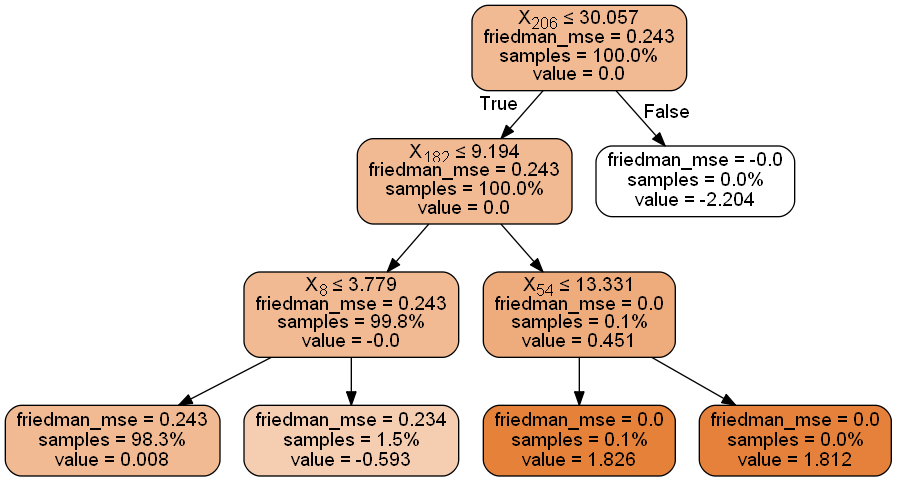

In [93]:
from sklearn import tree
# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

# Graph tree
dot_data = tree.export_graphviz(
    model_gbt_60m.estimators_[9, 0],
    out_file=None, filled=True,
    rounded=True,
    special_characters=True,
    proportion=True,
    )
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Regression

In [94]:
# Load the model to predict values
from tensorflow.keras.models import model_from_json
import importlib
import Machine_Learning_Models.rnn
importlib.reload(Machine_Learning_Models.rnn)
from Machine_Learning_Models.rnn import *

In [95]:
combined_reg_df_60m = combined_df_shift_60m[['user_followers', 'weighted_compound', 'return']]
combined_reg_df_60m.head()

,user_followers,weighted_compound,return
date,,,
2020-08-09 00:00:00,6741.0,151.8310,0.001041
2020-08-09 19:00:00,89.0,81.6041,0.001041
2020-08-09 20:00:00,225.0,0.0000,0.000780
2020-08-10 00:00:00,48170.0,12915.7218,0.000780
2020-08-10 05:00:00,335918.0,6425.1753,0.001039


In [96]:
# Predict Closing Prices using a 4 hours window of previous fng values
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 4

# Column index 1 is the 'compound' column
# Column index 2 is the `return` column
extra_col = 1
feature_col = 0
target_col = 2
X_60m, y_60m = window_data(combined_reg_df_60m, window_size, feature_col, target_col, extra_col)

In [97]:
X_train_60m, X_test_60m, y_train_60m, y_test_60m, y_test_scaler_60m = data_split_scale(X_60m, y_60m)

In [98]:
# Load json and create model
file_path = Path("rnn_60m.json")
with open(file_path, "r") as json_file:
    model_json = json_file.read()
model_rnn_60m = model_from_json(model_json)

# Load weights into new model
file_path = "rnn_60m.h5"
model_rnn_60m.load_weights(file_path)

In [99]:
model_rnn_60m.compile(optimizer="adam", loss="mean_squared_error")

In [100]:
# Evaluate the model
model_rnn_60m.evaluate(X_test_60m, y_test_60m, verbose=1)

31/31 [==============================] - 2s 4ms/step - loss: 0.0207


0.015866396948695183

In [101]:
# Make some predictions
predicted_rnn_60m = model_rnn_60m.predict(X_test_60m)

In [102]:
# Recover the original prices instead of the scaled version
predicted_prices_60m = y_test_scaler_60m .inverse_transform(predicted_rnn_60m)
real_prices_60m = y_test_scaler_60m.inverse_transform(y_test_60m.reshape(-1, 1))

In [103]:
# Create a DataFrame of Real and Predicted values
stocks_60m = pd.DataFrame({
    "Real_60m": real_prices_60m.ravel(),
    "Predicted_60m": predicted_prices_60m.ravel()
}, index = combined_reg_df_60m.index[-len(real_prices_60m): ]) 
stocks_60m.tail()

,Real_60m,Predicted_60m
date,,
2021-02-18 12:00:00,-0.002165,-0.006133
2021-02-18 13:00:00,-0.000003,-0.006077
2021-02-18 14:00:00,-0.000576,-0.006099
2021-02-18 15:00:00,-0.000869,-0.006112
2021-02-18 16:00:00,0.001159,-0.006149


In [104]:
# Plot the real vs predicted values as a line chart
s_60 = stocks_60m.hvplot(title="Actual Vs. Predicted PFE Prices").opts(shared_axes=False)

## Algorithmic Trading

In [105]:
import importlib
import algo_trading
importlib.reload(algo_trading)
from algo_trading import *

In [106]:
# Construct Trading Signal
algo_df_60m = pd.concat([combined_df_shift_60m[['weighted_compound', 'return']], share_df_60m[['close']]], join = 'inner', axis = 1)
algo_signal_60m = generate_signals(algo_df_60m, 4, 16, 96)
algo_signal_60m.head()

,weighted_compound,return,close,weighted_compound_long,weighted_compound_short,sentiment_signal,fast_close,slow_close,crossover_long,crossover_short,crossover_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
date,,,,,,,,,,,,,,,,,,
2020-08-10 06:00:00,17164.567,-0.000952,35.733230,1.0,0.0,1.0,35.733230,35.733230,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-08-10 08:00:00,203.320,-0.003305,35.761096,1.0,0.0,1.0,35.748367,35.747465,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-08-10 09:00:00,-33613.080,0.001303,35.798250,0.0,-1.0,-1.0,35.767944,35.765132,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-08-10 10:00:00,9918.149,-0.002330,35.764161,1.0,0.0,1.0,35.766741,35.764873,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2020-08-10 11:00:00,0.000,0.001813,35.753851,0.0,0.0,0.0,35.763202,35.762474,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [107]:
# prepare trading data 
X_train_60m, X_test_60m, y_train_60m, y_test_60m = prepare_model(algo_signal_60m)

Training Start: 2020-08-10 08:00:00
Training End: 2021-01-01 20:00:00
Testing Start: 2021-01-02 04:15:00
Testing End: 2021-02-18 16:00:00


In [108]:
# Load the model and make the predictions from the x test dataset
model_algo_60m = load('algo_60m.joblib')

In [109]:
# Make a prediction of "y" values from the x test dataset
predictions_algo_60m = model_algo_60m.predict(X_test_60m)

# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results_60m = y_test_60m.to_frame()
Results_60m["Predicted Value"] = predictions_algo_60m
Results_60m.head()

,Positive Return,Predicted Value
date,,
2021-01-04 05:00:00,0.0,1.0
2021-01-04 06:00:00,0.0,1.0
2021-01-04 07:00:00,0.0,1.0
2021-01-04 08:00:00,0.0,1.0
2021-01-04 09:00:00,0.0,1.0


In [110]:
Results_60m_plot = Results_60m[["Positive Return", 'Predicted Value']].hvplot(title = '60 mins Trading Signal').opts(width=1000, height=500, shared_axes=False)
Results_60m_plot

:NdOverlay   [Variable]
   :Curve   [date]   (value)

In [111]:
# Replace predicted values 0 to -1 to account for shorting
results_60m = Results_60m.join(algo_df_60m['return'])
results_60m['Predicted Value'].replace(0, -1, inplace=True)
results_60m.head()

,Positive Return,Predicted Value,return
date,,,
2021-01-04 05:00:00,0.0,1.0,-0.001081
2021-01-04 06:00:00,0.0,1.0,-0.007624
2021-01-04 07:00:00,0.0,1.0,-0.003363
2021-01-04 08:00:00,0.0,1.0,-0.005336
2021-01-04 09:00:00,0.0,1.0,-0.000413


### Plot Cumulative Returns of Random Forest Model

In [112]:
# Calculate cumulative return of model and plot the result
cumulative_return_60m = (1 + (results_60m['return'] * results_60m['Predicted Value'])).cumprod()
cumulative_return_60m_plot = cumulative_return_60m.hvplot(groupby=['index.day'], title = '60 mins Compound Return').opts(axiswise=True)
cumulative_return_60m_plot

:DynamicMap   [index.day]
   :Curve   [date]   (0)

### Plot Cumulative Return of Random Forest Model (In Terms of Capital)

In [113]:
from bokeh.models.formatters import DatetimeTickFormatter
# Set initial capital allocation
initial_capital = 100000
formatter = DatetimeTickFormatter(months='%b %Y')
# Plot cumulative return of model in terms of capital
cumulative_return_capital_60m = initial_capital * (1 + (results_60m['return'] * results_60m['Predicted Value'])).cumprod()


In [114]:
cumulative_return_capital_60m_plot = cumulative_return_capital_60m.hvplot(title='Cumulative Capital').opts(yformatter="%.0f", axiswise=True)

In [115]:
cumulative_return_capital_60m_plot

:Curve   [date]   (0)

**Panel for Dashboard**
---

In [11]:
import panel as pn
from IPython.display import Image

In [117]:
# Create a Title for the Dashboard:
title = "# **Can We Make Profit from CovidVaccine Tweets?!**"

# Create a Tab Layout for the Dashboard:
row_word = pn.Row(Image("Images/wordCloud_1grams.png"),Image("Images/wordCloud_2grams.png"))
row_1 = pn.Column(cm_rf_15m, Image("Images/rf_15.png"))
row_2 = pn.Row(row_1, Image("Images/rf_im_15.png"))
row_3 = pn.Row(Image("Images/gnb_15.png"))
column_1 = pn.Column(Image("Images/gbt_15.png"), Image('Images/tree_15.png'))
row_5 = pn.Row(s_15)
row_6 = pn.Row(Results_15m_plot)
column_2 = pn.Column(cumulative_return_15m_plot, cumulative_return_capital_15m_plot)
row_7 = pn.Column(cm_rf_30m, Image("Images/rf_30.png"))
row_8 = pn.Row(row_7, Image("Images/rf_im_30.png"))
row_9 = pn.Row(Image("Images/gnb_30.png"))
column_3 = pn.Column(Image("Images/gbt_30.png"), Image('Images/tree_30.png'))
row_10 = pn.Row(s_30)
row_11 = pn.Row(Results_30m_plot)
column_4 = pn.Column(cumulative_return_30m_plot, cumulative_return_capital_30m_plot)
row_12 = pn.Column(cm_rf_60m, Image("Images/rf_60.png"))
row_13 = pn.Row(row_12, Image("Images/rf_im_60.png"))
row_14 = pn.Row(Image("Images/gnb_60.png"))
column_5 = pn.Column(Image("Images/gbt_60.png"), Image('Images/tree_60.png'))
row_15 = pn.Row(s_60)
row_16 = pn.Row(Results_60m_plot)
column_6 = pn.Column(cumulative_return_60m_plot, cumulative_return_capital_60m_plot)


# Create Tabs:
welcome_tab = pn.Column(
    "### This dashboard presents a Sensitivity Analysis on CovidVaccine Tweets and Use it to predict Pfizer Returns",
    "### You can nagivate through the tabs above to explore more details ",
    "##**Word Cloud:**", row_word)

tab_algo_15 = pn.Tabs(('Trading_Signal', row_6 ), ('Results', column_2))
tab_algo_30 = pn.Tabs(('Trading_Signal', row_11 ), ('Results', column_4))
tab_algo_60 = pn.Tabs(('Trading_Signal', row_16 ), ('Results', column_6))
    
tab_15 = pn.Tabs(("Random_Forest", row_2), ("GaussianNB", row_3), ("Gradiant Boost", column_1), ("LSTM", row_5), ("Algo Trading", tab_algo_15))
tab_30 = pn.Tabs(("Random_Forest", row_8), ("GaussianNB", row_9), ("Gradiant Boost", column_3), ("LSTM", row_10), ("Algo Trading", tab_algo_30))
tab_60 = pn.Tabs(("Random_Forest", row_13), ("GaussianNB", row_14), ("Gradiant Boost", column_5), ("LSTM", row_15), ("Algo Trading", tab_algo_60))

In [118]:
# Create a Dashboard:
dashboard = pn.Column(
    title,
    pn.Tabs(
        ("Welcome", welcome_tab),
        ("15 Mins", tab_15),
        ("30 Mins", tab_30),
        ("60 Mins", tab_60)
))

Column
    [0] Markdown(str)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] Markdown(str)
            [2] Markdown(str)
            [3] Row
                [0] PNG(Image)
                [1] PNG(Image)
        [1] Tabs
            [0] Row
                [0] Column
                    [0] DataFrame(DataFrame)
                    [1] PNG(Image)
                [1] PNG(Image)
            [1] Row
                [0] PNG(Image)
            [2] Column
                [0] PNG(Image)
                [1] PNG(Image)
            [3] Row
                [0] HoloViews(NdOverlay)
            [4] Tabs
                [0] Row
                    [0] HoloViews(NdOverlay)
                [1] Column
                    [0] Row
                        [0] HoloViews(DynamicMap)
                        [1] Column
                            [0] WidgetBox
                                [0] DiscreteSlider(margin=(20, 20, 20, 20), name='index.day', options=OrderedDict([('1', ...]), value=1, value_throttled=1, width=250)
                            [1] VSpacer()
                    [1] HoloViews(Curve)
        [2] Tabs
            [0] Row
                [0] Column
                    [0] DataFrame(DataFrame)
                    [1] PNG(Image)
                [1] PNG(Image)
            [1] Row
                [0] PNG(Image)
            [2] Column
                [0] PNG(Image)
                [1] PNG(Image)
            [3] Row
                [0] HoloViews(NdOverlay)
            [4] Tabs
                [0] Row
                    [0] HoloViews(NdOverlay)
                [1] Column
                    [0] Row
                        [0] HoloViews(DynamicMap)
                        [1] Column
                            [0] WidgetBox
                                [0] DiscreteSlider(margin=(20, 20, 20, 20), name='index.day', options=OrderedDict([('1', ...]), value=1, value_throttled=1, width=250)
                            [1] VSpacer()
                    [1] HoloViews(Curve)
        [3] Tabs
            [0] Row
                [0] Column
                    [0] DataFrame(DataFrame)
                    [1] PNG(Image)
                [1] PNG(Image)
            [1] Row
                [0] PNG(Image)
            [2] Column
                [0] PNG(Image)
                [1] PNG(Image)
            [3] Row
                [0] HoloViews(NdOverlay)
            [4] Tabs
                [0] Row
                    [0] HoloViews(NdOverlay)
                [1] Column
                    [0] Row
                        [0] HoloViews(DynamicMap)
                        [1] Column
                            [0] WidgetBox
                                [0] DiscreteSlider(margin=(20, 20, 20, 20), name='index.day', options=OrderedDict([('1', ...]), value=1, value_throttled=1, width=250)
                            [1] VSpacer()
                    [1] HoloViews(Curve)
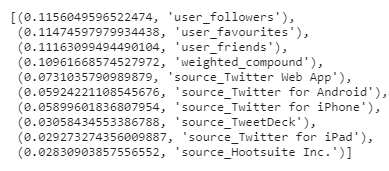
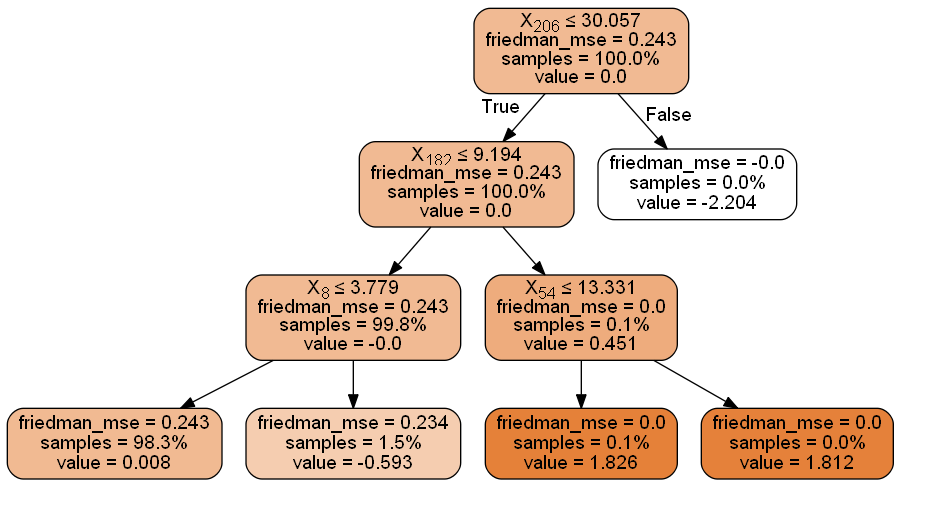
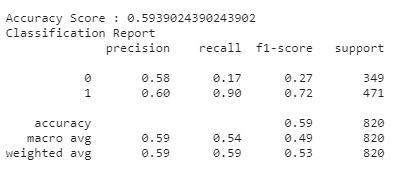
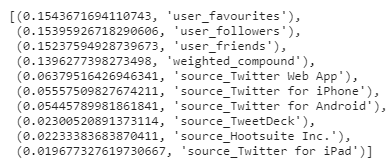
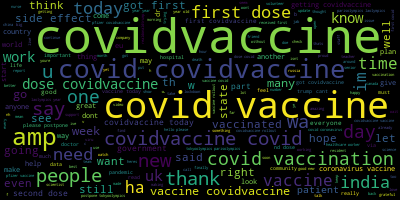
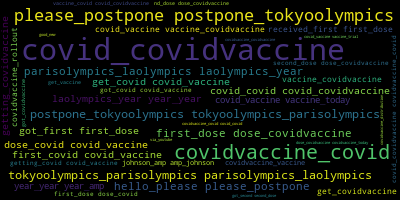
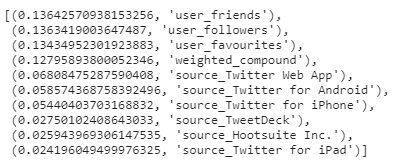
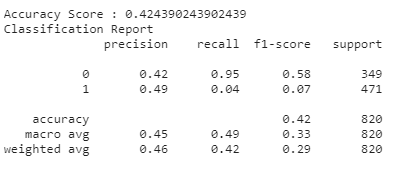
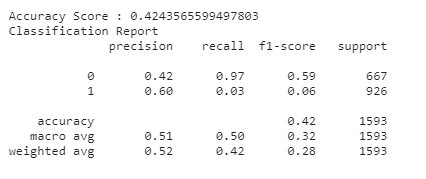
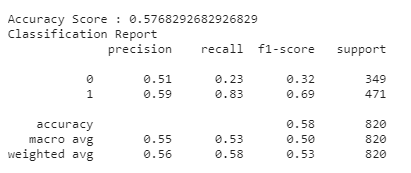
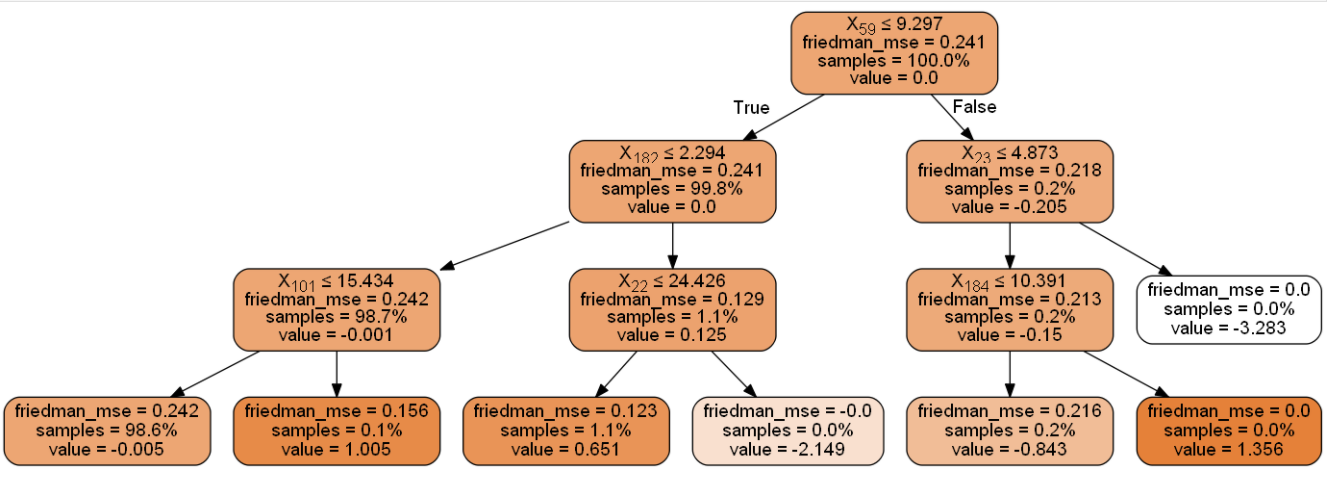
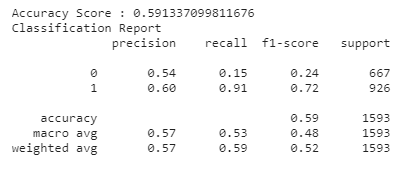
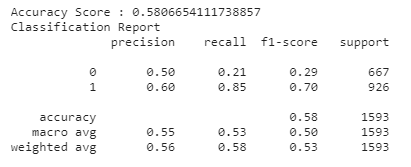
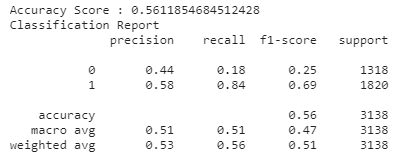
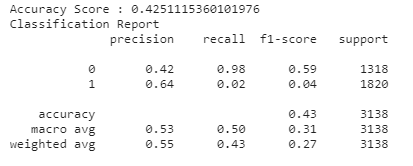
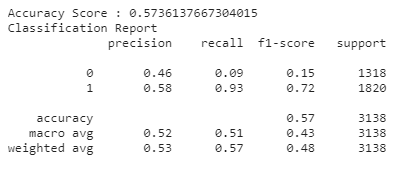
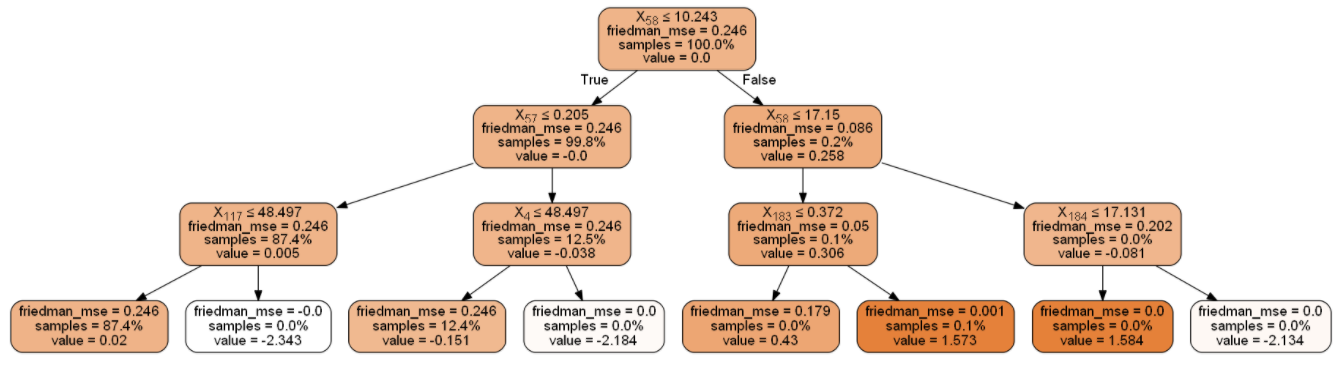

In [119]:
dashboard.servable()

In [120]:
dashboard.show()

Launching server at http://localhost:60204
